# Sistematização 1
```py
aluno = 'Ruan David da Silva'
ra = 22051922
materia = 'Metodos Matematicos'
ambiente_de_desenvolvimento = 'Jupyter Lab'
```

In [11]:
# Célula com os imports recomendados pelo professor
import numpy as np
import matplotlib as plt
import scipy

## Parte 1 - Série Trigonométrica
Considere o seguinte sinal:

![plotagem_grafico_exemplo](./assets/grafico_exemplo.jpeg)

Escreva um código em Python que calcule e plote a série de Fourier trigonométrica da função `f(x)`. Utilize 3, 10, 50 e 1000 harmônicos para observar como a série se aproxima da função original com o aumento do número de harmônicos

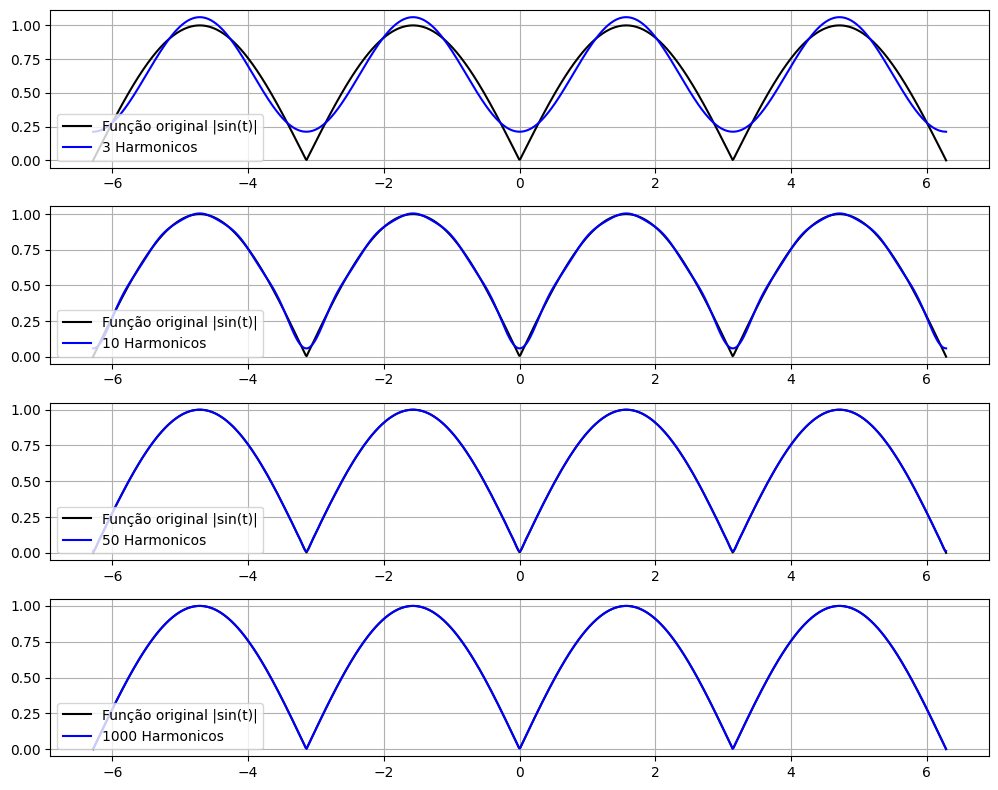

In [18]:
# Definindo a funcao da imagem
def f(t):
    return np.abs(np.sin(t))

# Calculando o termo médio
def calcularTermoMedio():
    result, _ = scipy.integrate.quad_vec(f, -np.pi, np.pi)
    return result / (2 * np.pi)

# Calculando o Coeficiente dos Senos
def calculaSenos(n):
    result, _ = scipy.integrate.quad_vec(lambda t: f(t) * np.cos(n * t), -np.pi, np.pi)
    return result / np.pi

# Step 3: Build the Fourier Series using only cosine terms
def fourier_series(t, N):
    a0 = calcularTermoMedio()
    result = a0 * np.ones_like(t)
    for n in range(1, N + 1):
        an = calculaSenos(n)
        result += an * np.cos(n * t)
    return result

# Step 4: Plotting
t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
original = f(t)

plt.pyplot.figure(figsize=(10, 8))
harmonicos = [3, 10, 50, 1000]

for i, N in enumerate(harmonicos, 1):
    approx = fourier_series(t, N)
    plt.pyplot.subplot(len(harmonicos), 1, i)
    plt.pyplot.plot(t, original, label='Função original |sin(t)|', color='black')
    plt.pyplot.plot(t, approx, label=f'{N} Harmonicos', color='blue')
    plt.pyplot.legend()
    plt.pyplot.grid(True)

plt.pyplot.tight_layout()
plt.pyplot.show()

## Parte 2 - Série Exponencial

Utilize a mesma função periódica f(x) e escreva um código em Python para calcular e plotar a série de Fourier exponencial.

Novamente, utilize 3, 10, 50 e 1000 harmônicos para comparar com os resultados obtidos na Parte 1.